![](https://drive.google.com/uc?export=view&id=1-5X9OUkA-C2Ih1gOS9Jd7GmkTWUEpDg1)

Asignatura: Introducción a Data Science

Profesor: Juan Bekios Calfa

# Laboratorio Número 5.4: Clasificación de género y predicción de la edad (Parte 04)
---

**Alumno:**

* *Nombre y apellido alumno*
* *Nombre y apellido alumno* (Opcional)

**Instrucciones:** 

*   Acondicionar las imágenes de UTKFace como se vio en las clases anteriores: cargar imágenes, convertir a escala de grises, y reducir su tamaño a imágenes de 25x25 y normalizar.
*   Separar las imágenes en un conjunto de entrenamiento (80%) y pruebas (20%), utilice el algoritmo *holdout* estratificado. Para encontrar los mejores hiperparámetros se utilizará una estrategia K-Fold (K=5) por medio de la funcion GridSearchCV.
*   Construir una base PCA con el conjunto de entrenamiento, y proyectar los datos, con la base aprendida, reteniendo diferentes grupos de componentes principales. 
*   Utilizando diferentes configuraciones de hiperparámetros implemente un clasificador de género. 
*   Grafique el rendimiento de cada clasificador dependiendo de la cantidad de componentes principales retenidos.
*   Realizar los mismos experimentos para obtener un modelo regresor que prediga la edad.
*   Comparar los resultados.
*   Generar conclusiones sobre los resultados obtenidos.

Leer y revisar la publicación: [Revisiting Linear Discriminant Techniques in Gender Recognition (2011)](http://www.dia.fi.upm.es/~pcr/publications/pami2011.pdf)

## Analizar los datos entregados para el laboratorio

### Cargar los datos

En el ejemplo se hace una carga utilizando *Google Drive*:

1.   Hacer click en la pestaña **Files** del panel de la izquierdo.
2.   Hacer click en ***Mount Drive***.
3.   Ir a la url indicada en *Go to this URL in a browser*.
4.   Copiar código de acceso y agregarlo a *Enter your authorization code*.
5.   Establecer la conexión con Pandas.

También se puede subir el archivo utilizando la opción *Upload* del panel izquierdo.





# 1. Acondicionar imágenes del *dataset* UTKFace
## 1.2 Cargar imágenes
Las imágenes son de una base de datos de caras llamada UTKFace.

El *dataset* UTKFace es un conjunto de datos faciales a gran escala con un rango de edad prolongado (rango de 0 a 116 años). El conjunto de datos consta de más de 20.000 imágenes de rostros con anotaciones de edad, sexo y etnia. Las imágenes cubren una gran variación en pose, expresión facial, iluminación, oclusión, resolución, etc. Este conjunto de datos podría usarse en una variedad de tareas, por ejemplo, detección de rostros, estimación de edad, progresión de edad. [Link UTKFace](https://susanqq.github.io/UTKFace/).

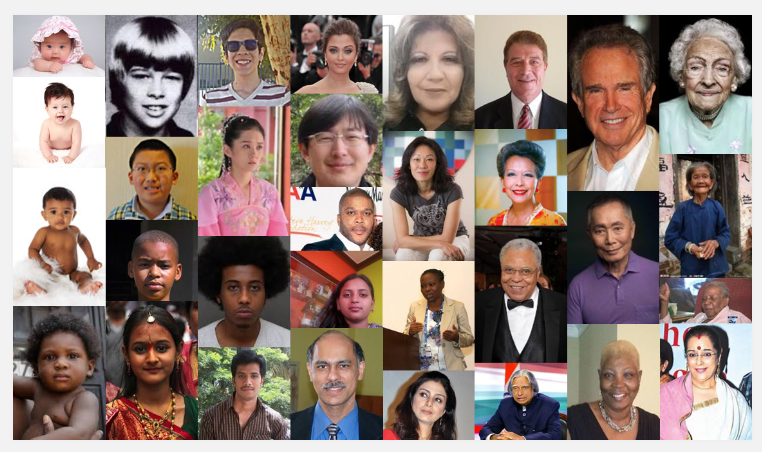

Para el ejercicio de clases utilizaremos las imágenes alineadas y recortadas que ya fueron procesadas.




In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/COQ-ESC-UCN/Classes/IntroDataScience/IDS-2022-2/Laboratorio/Laboratorio05: Clasificacion/UTKFace

Mounted at /gdrive
/gdrive/MyDrive/COQ-ESC-UCN/Classes/IntroDataScience/IDS-2022-2/Laboratorio/Laboratorio05: Clasificacion/UTKFace


## 1.2 Convertir las imágenes a escalas de grises, reescalarlas y convertirlas a un vector.

Primero creo un dataframe con los nombres de las imágenes y las etiquetas que me interesan, en este caso, género y edad.

In [6]:
import os
import pandas as pd

# Cargo los nombres de las imágenes que están en el directorio UTKFaces
res = os.listdir('.') 

print(res)

dic = {"name_file":[], "gender":[], "age":[]}

# Leo cada uno de los nombres de los archivos que están en google Drive y extraígo su información
for str in res:
  dic["name_file"].append(str)
  labels_str = str.split("_")
  gender = labels_str[1]
  age =labels_str[0]
  dic["gender"].append(gender)
  dic["age"].append(age)

# Inicializo un data frame con los datos obtenidos en el diccionario
df = pd.DataFrame(dic)

df.tail()

['45_0_3_20170119171701550.jpg.chip.jpg', '45_0_3_20170119183426844.jpg.chip.jpg', '45_0_3_20170119181420596.jpg.chip.jpg', '45_0_3_20170119184144631.jpg.chip.jpg', '45_0_3_20170119183704615.jpg.chip.jpg', '45_0_3_20170119183849743.jpg.chip.jpg', '45_0_3_20170119175445883.jpg.chip.jpg', '45_0_3_20170119184153479.jpg.chip.jpg', '45_0_3_20170119194520650.jpg.chip.jpg', '45_0_3_20170119194836227.jpg.chip.jpg', '45_0_3_20170119194832939.jpg.chip.jpg', '45_0_3_20170119195643531.jpg.chip.jpg', '45_0_3_20170119195305345.jpg.chip.jpg', '45_0_3_20170119194525986.jpg.chip.jpg', '45_0_3_20170119194628649.jpg.chip.jpg', '45_0_3_20170119200329836.jpg.chip.jpg', '45_0_3_20170119195808299.jpg.chip.jpg', '45_0_3_20170119195829723.jpg.chip.jpg', '45_0_3_20170119200136571.jpg.chip.jpg', '45_0_3_20170119195752949.jpg.chip.jpg', '45_0_3_20170119195659219.jpg.chip.jpg', '45_0_3_20170119200658085.jpg.chip.jpg', '45_0_3_20170119201135740.jpg.chip.jpg', '45_0_3_20170119201128901.jpg.chip.jpg', '45_0_3_2017011

,name_file,gender,age
16585,1_1_0_20161219205534526.jpg.chip.jpg,1,1
16586,1_1_2_20161219205644669.jpg.chip.jpg,1,1
16587,1_1_2_20161219205649948.jpg.chip.jpg,1,1
16588,6_1_2_20161219205748924.jpg.chip.jpg,1,6
16589,1_0_2_20161219205702141.jpg.chip.jpg,0,1


Revisamos si las imágenes cargaron correctamente.

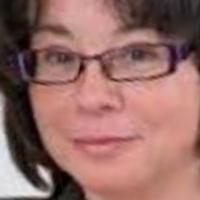

In [7]:
# Librerías para manipulación de imágenes
from PIL import Image, ImageOps 

# Abrir una imagen con PIL
im = Image.open(df["name_file"][100]) 

#np.asarray(im).shape
display(im)

Cambiamos la imagen de espacio de color a gris, y la reescalamos. Además, creamos la matriz que contenga cada una de las imagenes.

In [15]:
import numpy as np

# NOTA: Para la prueba final deben utilizar todas las imágenes, ahora solo uso 6000 para probar 
# los algoritmos.
num_examples = 6000

lst_images = []
for name_image in df['name_file'][:num_examples]:
  # Leo la imagen en color
  im = Image.open(name_image) 
  # Cambiar de espacio de color a gris
  imgray = ImageOps.grayscale(im)
  # Reducir su tamaño
  imr = imgray.resize((25, 25))
  # Convertir la imagen a un objeto numpy
  im_numpy = np.asarray(imr)
  # Convertir la imagen a un vector
  flat_image = im_numpy.flatten().copy()
  # Agregar a la lista 
  lst_images.append(flat_image)


X = np.vstack(lst_images)

# Cargo las etiquetas
y_gender = np.array(list(df['gender'][:num_examples]))
y_age = np.array(list(df['age'][:num_examples]))

#2. Validación de los modelos

Para la validación de los modelos separaremos el *dataset* en:

* Conjunto de entrenamiento (60%)
* Conjunto de validación (20%)
* Conjunto de pruebas (20%)

Se utilizará la técnica *holdout* con selección estratificada para que cada clase tenga una cantidad equitativa de ejemplos.

**Primero**: Seleccionamos los datos para los experimentos de género.

In [18]:
# Agregamos librerías para estos experimentos
from sklearn.model_selection import train_test_split

# El parámetro stratify debe contener la lista de etiquetas para que pueda hacer la estratificación
# si el parámetro stratify es None, seleccionará de forma aleatoria
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, y_gender, test_size=0.2, shuffle=True, stratify=y_gender, random_state=2)

print(f'Ejemplos seleccionados para entrenamiento (60%): {len(y_train_gender)}')
print(f'Ejemplos seleccionados para pruebas (40%): {len(y_test_gender )}')

Ejemplos seleccionados para entrenamiento (60%): 4800
Ejemplos seleccionados para pruebas (40%): 1200


**Segundo**: Seleccionamos los ejemplos para edad.

In [ ]:
# Prepare los datos para edad aquí

# CODIGO AQUÍ
# Nota: Recuerde comentar su código

#3. Construir una base PCA para proyectar los datos a un nuevo subespacio (Reducción de dimensiones)

Construimos el modelo PCA para las imágenes. El algoritmo de PCA es un método de aprendizaje NO supervisado por lo tanto no necesita las etiquetas clases para su entrenamiento.

Sin embargo, para el proceso de validación de modelos hemos creados conjuntos de datos de entrenamiento, validación y pruebas diferentes. Debido a esto, ajustaremos un modelo de PCA para los experimentos de género y otro para los experimentos de edad.

**Modelo PCA para género**

In [19]:
from sklearn.decomposition import PCA
from time import time

print(f"Extraemos los todos eigenfaces (autovectores) de {X_train_gender.shape[0]} caras")

t0 = time()

#Retenemos todos los componentes PCA
pca_gender = PCA(n_components=None, svd_solver="auto", whiten=True)
pca_gender.fit(X_train_gender)
print(f"Terminado {time() - t0:0.3f}s")

#eigenfaces = pca_gender.components_.reshape((n_components, h, w))

print("Proyectamos los datos utilizando la base ortonormal")

t0 = time()
X_train_pca_gender = pca_gender.transform(X_train_gender)
print(X_train_pca_gender.shape)

X_test_pca_gender = pca_gender.transform(X_test_gender)
print(X_test_pca_gender.shape)

print(f"Terminado en {time() - t0:0.3f}s")

Extraemos los todos eigenfaces (autovectores) de 4800 caras
Terminado 1.424s
Proyectamos los datos utilizando la base ortonormal
(4800, 625)
(1200, 625)
Terminado en 0.252s


**Modelo PCA para edad**

In [ ]:
# Prepare los datos para edad aquí

# CODIGO AQUÍ
# Nota: Recuerde comentar su código

#4. Configuración del modelo

Se probará secuencias de 10 en 10 componentes principales para probar diferentes combinaciones de hiperparámetros. Guardaremos los mejores modelos de cada retención de componentes principales para luego seleccionar el mejor.

**Evaluación de modelos: Género**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
from copy import deepcopy

print(loguniform(1e3, 1e5))

print("Ajustando el clasificador a el conjunto de entrenamiento")
t0 = time()

param_grid = {
    "C": [1e0, 1e1, 1e2, 1e3], 
    "gamma": np.logspace(-2, 2, 5)
}

dic_clf = {}
for pca_retenidos in range(10, 410, 10):
  X_pca_train_aux = X_train_pca_gender[:, :pca_retenidos]
  print(X_pca_train_aux.shape)
  print(np.unique(y_train_gender))

  # Se buscarán los mejores hiperparámetros utilizando una estrategia 
  # K-Fold (K=5)
  clf =  GridSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid=param_grid, cv=5)

  # clf contiene un modelo entrenado.
  clf = clf.fit(X_pca_train_aux, y_train_gender)

  # Guardo el mejor clasificador para cada conjunto de proyecciones PCA
  dic_clf[pca_retenidos] = deepcopy(clf)

print(f"Terminado {time() - t0:0.3f}s")

# Muestro los resultados de los mejores clasificadores y la cantidad de 
# componentes principales retenidos
for i in range(10,410,10):
  clf = dic_clf[i]
  print(f"El mejor estimador encontrado utilizando búsqueda de grilla para {i} componente principales retenidos es:")
  print(clf.best_estimator_)
  print(clf.best_score_)

Ajustando el clasificador a el conjunto de entrenamiento
(4800, 10)
['0' '1']
(4800, 20)
['0' '1']
(4800, 30)
['0' '1']
(4800, 40)
['0' '1']
(4800, 50)
['0' '1']
(4800, 60)
['0' '1']


**Evaluación de modelos: Edad**

In [ ]:
# Evaluación de modelos para edad aquí

# CODIGO AQUÍ
# Nota: Recuerde comentar su código

#5. Graficar rendimiento

Para visualizar el rendimiento de los clasificadores se mostrarán dos gráficos: 

Uno para ver la importancia de la reducción de dimensiones en la mejora de un clasificador de género o regresor de edad.

Y otro para ver el comportamiento del mejor clasificador: Gráfico de función de pérdida por iteraciones y gráfico de tasa de acierto por iteraciones.

**Gráfico de género**

1. Gráfico de componentes retenidos versus tasa de acierto.


2. Gráfico de mejor modelo para género. (Gráfico número de iteraciones vs loss y gráfico número de iteraciones vs tasa de acierto)

**Gráfico de edad**

1. Gráfico de componentes retenidos versus tasa de acierto.

2. Gráfico de mejor modelo para género. (Gráfico número de iteraciones vs loss y gráfico número de iteraciones vs tasa de acierto)

#6. Resultados

Comparar los resultados para los mejores clasificadores. Utilice las métricas recall, precision, f1-score y tasa de acierto global.

**Resultados género:**

**Resultados edad:**

**Discusión de resultados**

Explicar los resultados obtenidos.

#7. Conclusiones

Explicar que puede deducir de los resultados obtenidos